In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
kilid= pd.read_csv("kilid.csv")

In [33]:
kilid.head()

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه..."
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت..."
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز"
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن"
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی..."


In [34]:
kilid.describe()

,district_number,real_estate_area,total_rooms,number_of_parking,real_estate_age,price
count,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,2.995400e+04
mean,3.026808,146.204881,2.196034,1.240101,9.509114,3.110369e+10
std,1.886007,388.138720,1.224873,1.638835,10.258502,1.029106e+12
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,75.000000,2.000000,1.000000,0.000000,5.500000e+09
50%,2.000000,105.000000,2.000000,1.000000,8.000000,1.020000e+10
75%,5.000000,150.000000,3.000000,1.000000,17.000000,2.000000e+10
max,9.000000,35000.000000,100.000000,187.000000,401.000000,1.521000e+14


In [35]:
kilid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29954 entries, 0 to 29953
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_number    29954 non-null  int64  
 1   district_name      29954 non-null  object 
 2   real_estate_type   29954 non-null  object 
 3   real_estate_area   29954 non-null  float64
 4   total_rooms        29954 non-null  int64  
 5   number_of_parking  29954 non-null  int64  
 6   real_estate_age    29954 non-null  int64  
 7   price              29954 non-null  float64
 8   facilities         28458 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.1+ MB


In [36]:
kilid['facilities'].fillna(',',inplace=True)

In [37]:
kilid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29954 entries, 0 to 29953
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_number    29954 non-null  int64  
 1   district_name      29954 non-null  object 
 2   real_estate_type   29954 non-null  object 
 3   real_estate_area   29954 non-null  float64
 4   total_rooms        29954 non-null  int64  
 5   number_of_parking  29954 non-null  int64  
 6   real_estate_age    29954 non-null  int64  
 7   price              29954 non-null  float64
 8   facilities         29954 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.1+ MB


In [38]:
# exploded_kilid=kilid['facilities'].str.split(',').explode()
# kilid_get_dummy=pd.get_dummies(exploded_kilid)
# kilid_result=kilid_get_dummy.groupby(kilid_get_dummy.index).sum()
# # merge_df=kilid.merge(kilid_result,on=kilid.index)

In [39]:
exploded_df = kilid['facilities'].map(lambda x:x.split(",")).explode()

one_hot_encoded = pd.get_dummies(exploded_df , dtype="int")

result_df = one_hot_encoded.groupby(one_hot_encoded.index).sum()

result_df.drop(columns="",  inplace=True)

In [40]:
merged_df = kilid.merge(result_df, left_index=True, right_index=True)

merged_df

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,0,1,0,0,0,0,0
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,0
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,0,1,0,0,0,0,0
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,0
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,0,1,1,0,0,0,0
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,0
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,0
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,0,1,1,0,0,0,0


In [41]:
list_of_facilities=merged_df['facilities'].str.split(',').explode().value_counts()

In [42]:
list_of_facilities

facilities
انباری           26866
آسانسور          22611
بالکن            21473
درب ریموت        15515
لابی             12408
آنتن مرکزی       12290
نگهبان           11517
تهویه مطبوع      10370
سالن اجتماعات     8032
نوساز             6932
سالن ورزش         5861
روف گاردن         5702
جکوزی             5085
سونا              4939
استخر             4811
                  2992
وام دار           2544
قدرالسهم          2380
قیمت توافقی       2172
پیش فروش           904
معاوضه             478
مال                189
مشارکتی            129
موقعیت اداری        83
پاساژ               62
قابل تبدیل           3
پارکینگ              1
Name: count, dtype: int64

In [43]:
merged_df.columns

Index(['district_number', 'district_name', 'real_estate_type',
       'real_estate_area', 'total_rooms', 'number_of_parking',
       'real_estate_age', 'price', 'facilities', 'آسانسور', 'آنتن مرکزی',
       'استخر', 'انباری', 'بالکن', 'تهویه مطبوع', 'جکوزی', 'درب ریموت',
       'روف گاردن', 'سالن اجتماعات', 'سالن ورزش', 'سونا', 'قابل تبدیل',
       'قدرالسهم', 'قیمت توافقی', 'لابی', 'مال', 'مشارکتی', 'معاوضه',
       'موقعیت اداری', 'نوساز', 'نگهبان', 'وام دار', 'پارکینگ', 'پاساژ',
       'پیش فروش'],
      dtype='object')

In [44]:
residental=merged_df[merged_df['real_estate_type']=='آپارتمان/برج'].copy()
residental

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,0,1,0,0,0,0,0
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,0
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,0,1,0,0,0,0,0
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,0
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,0,1,1,0,0,0,0
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,0
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,0
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,0,1,1,0,0,0,0


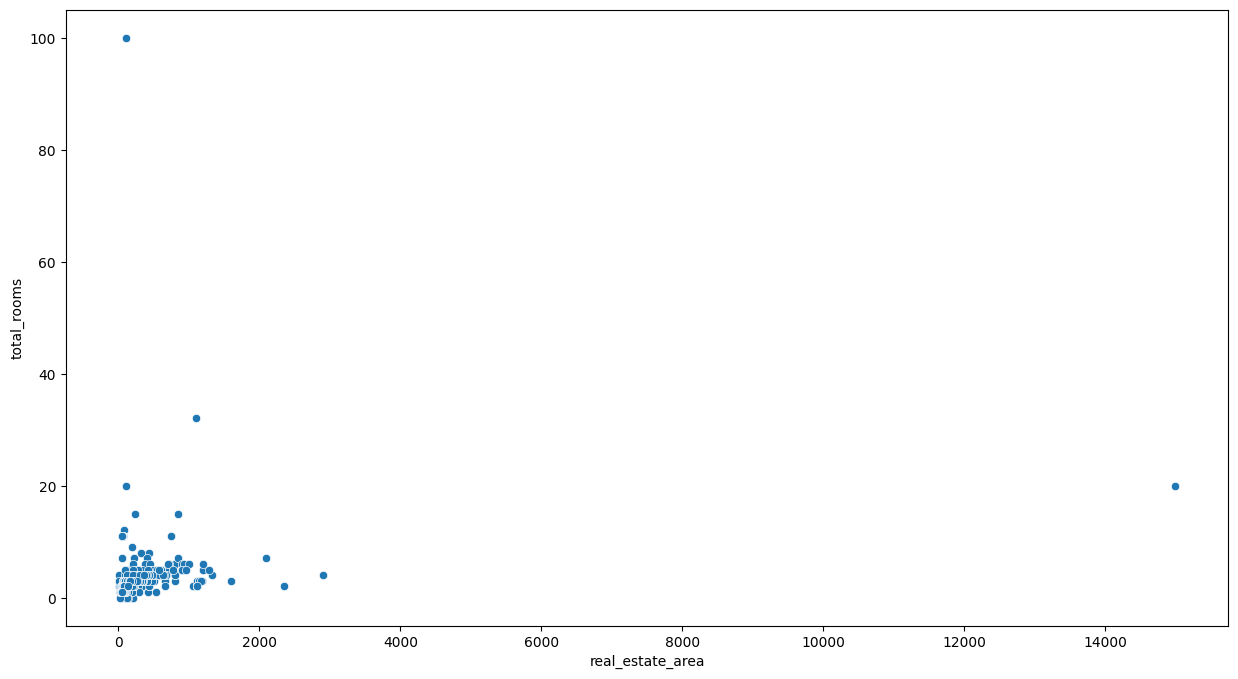

In [45]:
attributes = ["real_estate_area", "total_rooms"]
# pd.plotting.scatter_matrix(merged_df[attributes],figsize=(20,10));
plt.figure(figsize=(15,8))
sns.scatterplot(x=residental[attributes[0]],y=residental[attributes[1]]);

In [46]:
residental.drop_duplicates(inplace=True)

In [48]:
# residental[residental['real_estate_area']>1000]

In [49]:
residental.drop(residental[residental['real_estate_area']>4000].index,inplace=True)

In [56]:
401/10

40.1

In [65]:
index_age=residental[(residental['real_estate_age']>100)].index
residental.loc[index_age,'real_estate_age']=residental[(residental['real_estate_age']>100)]['real_estate_age'].apply(lambda x:x//10)
# residental[(residental['real_estate_age']>100)]['real_estate_age'].apply(lambda x:x//10)

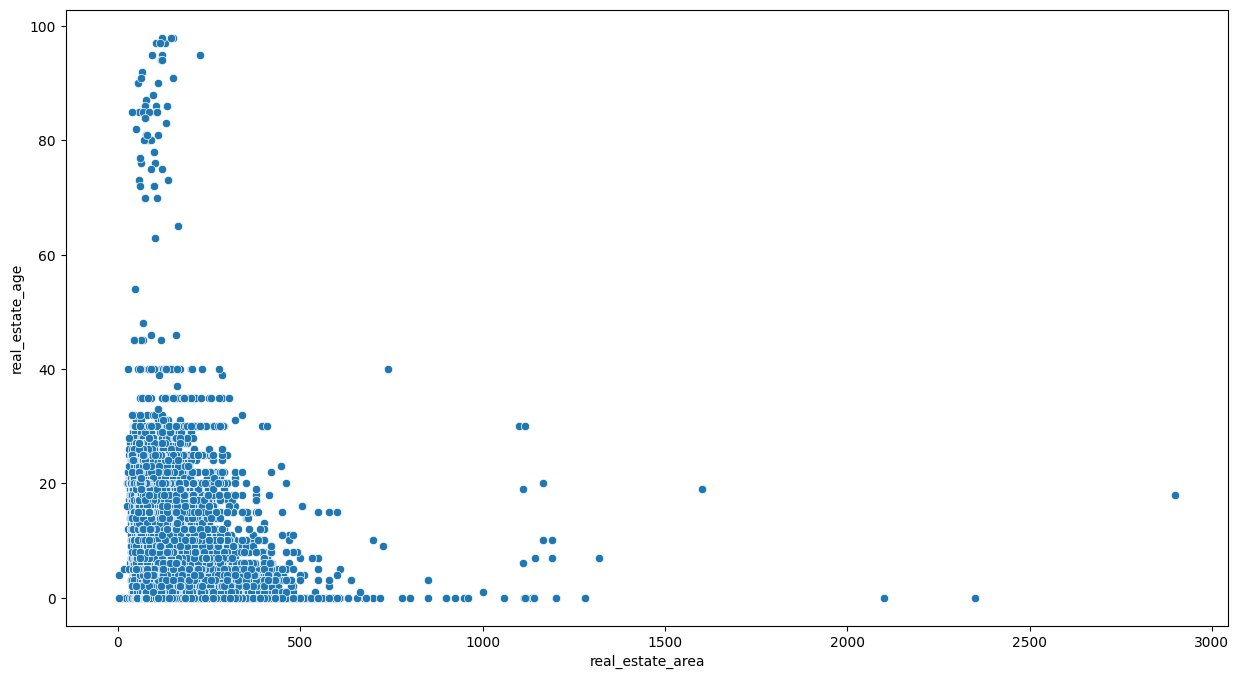

In [67]:
attributes = ["real_estate_area", "real_estate_age"]
# pd.plotting.scatter_matrix(merged_df[attributes],figsize=(20,10));
plt.figure(figsize=(15,8))
sns.scatterplot(x=residental[attributes[0]],y=residental[attributes[1]]);

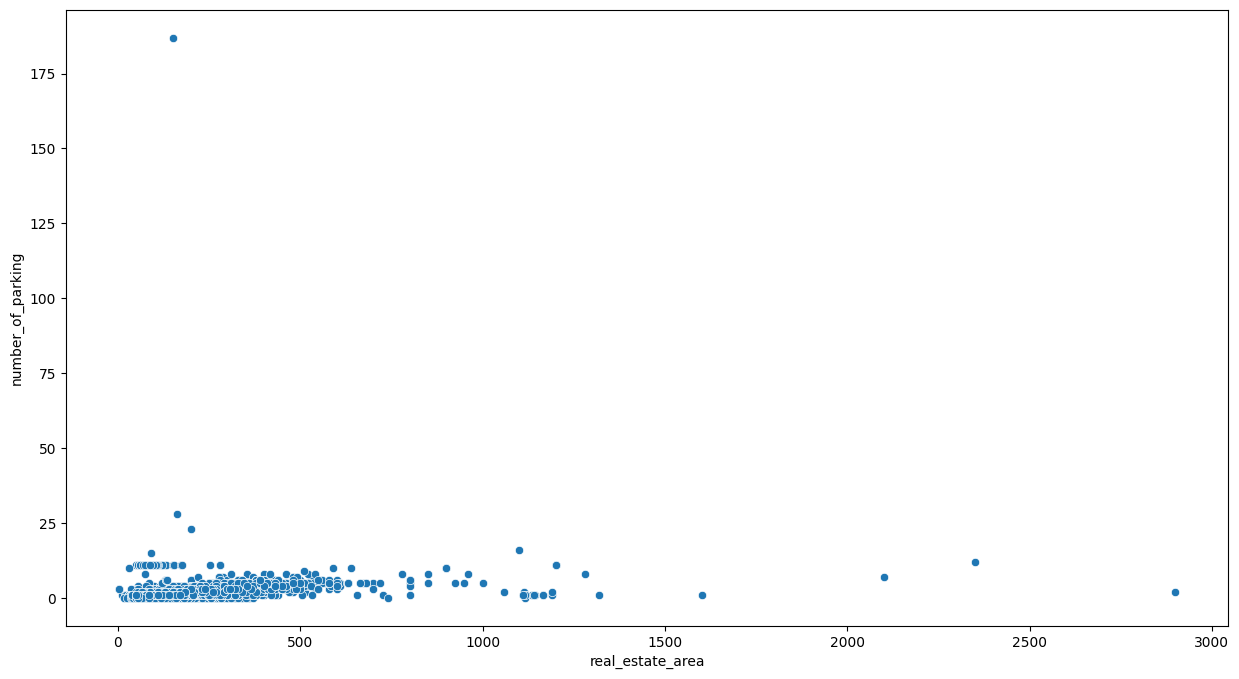

In [68]:
attributes = ["real_estate_area", "number_of_parking"]
# pd.plotting.scatter_matrix(merged_df[attributes],figsize=(20,10));
plt.figure(figsize=(15,8))
sns.scatterplot(x=residental[attributes[0]],y=residental[attributes[1]]);

In [71]:
residental[residental['number_of_parking']>=10]

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
21,2,شهرک غرب,آپارتمان/برج,121.0,2,11,10,2.100000e+10,"بالکن,آسانسور,انباری",1,...,0,0,0,0,0,0,0,0,0,0
290,5,بهنام‎,آپارتمان/برج,81.0,2,11,16,7.000000e+09,"آسانسور,بالکن,انباری,وام دار",1,...,0,0,0,0,0,0,1,0,0,0
671,2,سعادت اباد,آپارتمان/برج,1100.0,32,16,30,3.500000e+11,"درب ریموت,انباری,بالکن",0,...,0,0,0,0,0,0,0,0,0,0
795,7,مجیدیه - دبستان,آپارتمان/برج,108.0,2,11,70,8.100000e+09,"بالکن,نگهبان,لابی,درب ریموت,آنتن مرکزی,انباری,...",1,...,0,0,0,0,0,1,0,0,0,0
877,2,کوهک,آپارتمان/برج,133.0,2,11,0,0.000000e+00,"نگهبان,درب ریموت,انباری,استخر,آنتن مرکزی,سالن ...",1,...,0,0,1,0,1,1,0,0,0,0
1239,2,سعادت اباد,آپارتمان/برج,150.0,3,11,9,2.550000e+10,"لابی,انباری,آسانسور,بالکن",1,...,0,0,0,0,0,0,0,0,0,0
2502,5,پونک شمالی,آپارتمان/برج,77.0,2,11,18,6.500000e+09,"بالکن,آنتن مرکزی,انباری,درب ریموت,قدرالسهم",0,...,0,0,0,0,0,0,0,0,0,0
4586,2,سعادت اباد,آپارتمان/برج,162.0,3,28,0,3.160000e+10,"سالن ورزش,جکوزی,لابی,تهویه مطبوع,بالکن,روف گار...",1,...,0,0,0,0,1,1,0,0,0,0
5631,5,فردوس,آپارتمان/برج,50.0,2,11,15,3.800000e+09,"انباری,آسانسور,قدرالسهم,وام دار",1,...,0,0,0,0,0,0,1,0,0,0
5640,1,زعفرانیه,آپارتمان/برج,1200.0,5,11,0,0.000000e+00,"بالکن,آنتن مرکزی,تهویه مطبوع,روف گاردن,نگهبان,...",1,...,0,0,0,0,1,1,0,0,0,0


In [74]:
index_parking_1=residental['number_of_parking'][(residental['number_of_parking']<100)&(residental['number_of_parking']>=10)&(residental['real_estate_area']<400)].index
index_parking_2=residental['number_of_parking'][residental['number_of_parking']>=100].index
residental.loc[index_parking_1,'number_of_parking']=residental.loc[index_parking_1,'number_of_parking'].apply(lambda x:x//10)
residental.loc[index_parking_2,'number_of_parking']=residental.loc[index_parking_2,'number_of_parking'].apply(lambda x:x//100)


In [75]:
residental[residental['number_of_parking']>=10]

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
671,2,سعادت اباد,آپارتمان/برج,1100.0,32,16,30,3.500000e+11,"درب ریموت,انباری,بالکن",0,...,0,0,0,0,0,0,0,0,0,0
5640,1,زعفرانیه,آپارتمان/برج,1200.0,5,11,0,0.000000e+00,"بالکن,آنتن مرکزی,تهویه مطبوع,روف گاردن,نگهبان,...",1,...,0,0,0,0,1,1,0,0,0,0
8619,1,زعفرانیه,آپارتمان/برج,1200.0,5,11,0,0.000000e+00,"روف گاردن,بالکن,سالن اجتماعات,تهویه مطبوع,درب ...",1,...,0,0,0,0,1,1,0,0,0,0
14092,1,فرشته,آپارتمان/برج,900.0,6,10,0,4.050000e+11,"سالن ورزش,تهویه مطبوع,سونا,درب ریموت,آنتن مرکز...",1,...,0,0,0,0,1,1,0,0,0,0
14124,1,الهیه,آپارتمان/برج,900.0,5,10,0,4.050000e+11,"استخر,سالن ورزش,روف گاردن,لابی,آنتن مرکزی,درب ...",1,...,0,0,0,0,1,1,0,0,0,0
14163,6,امیراباد,آپارتمان/برج,2350.0,2,12,0,3.408000e+11,"درب ریموت,انباری,سالن اجتماعات,لابی,بالکن,تهوی...",0,...,1,0,1,1,1,1,1,0,0,0
17369,1,صاحبقرانیه,آپارتمان/برج,590.0,5,10,0,2.419000e+11,"نگهبان,روف گاردن,درب ریموت,تهویه مطبوع,آسانسور...",1,...,0,0,0,0,1,1,0,0,0,0
20501,1,فرشته,آپارتمان/برج,900.0,5,10,0,4.050000e+11,"نگهبان,سالن ورزش,آسانسور,بالکن,سونا,تهویه مطبو...",1,...,0,0,0,0,1,1,0,0,0,0
21459,1,ولنجک,آپارتمان/برج,1200.0,6,11,0,0.000000e+00,"آنتن مرکزی,سونا,استخر,لابی,انباری,درب ریموت,سا...",1,...,0,0,0,0,1,1,0,0,0,0
22486,1,زعفرانیه,آپارتمان/برج,640.0,4,10,3,0.000000e+00,"جکوزی,نگهبان,بالکن,سالن اجتماعات,انباری,لابی,ت...",1,...,0,0,0,0,0,1,0,0,0,0


In [76]:
residental["price_per_metr"] = residental["price"] / residental["real_estate_area"]

In [77]:
residental

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش,price_per_metr
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,1,0,0,0,0,0,1.181034e+08
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,9.666667e+07
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,1,0,0,0,0,0,1.086667e+08
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,1.207547e+08
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,1,1,0,0,0,0,1.200000e+08
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,5.882353e+07
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,9.454545e+07
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,1,1,0,0,0,0,1.200000e+08


In [78]:
residental.describe()

,district_number,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,آسانسور,آنتن مرکزی,استخر,انباری,...,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش,price_per_metr
count,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,2.847800e+04,28478.000000,28478.000000,28478.000000,28478.00000,...,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,28478.000000,2.847800e+04
mean,3.074654,122.127713,2.241766,1.194255,9.072723,2.915380e+10,0.782674,0.423063,0.161458,0.92036,...,0.003757,0.015380,0.002563,0.237482,0.394059,0.088524,0.000035,0.002142,0.031638,1.887496e+08
std,1.888965,81.932054,1.004300,0.828806,8.978463,1.054537e+12,0.412433,0.494054,0.367959,0.27074,...,0.061183,0.123062,0.050566,0.425547,0.488656,0.284061,0.005926,0.046233,0.175039,4.019463e+09
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,74.000000,2.000000,1.000000,0.000000,5.700000e+09,1.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+07
50%,3.000000,103.000000,2.000000,1.000000,8.000000,1.020000e+10,1.000000,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048161e+08
75%,5.000000,144.000000,3.000000,1.000000,16.000000,1.940000e+10,1.000000,1.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.470588e+08
max,9.000000,2900.000000,100.000000,16.000000,98.000000,1.521000e+14,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+11


In [79]:
def cut_and_plot(data, bins=[1e+7,2e+7, 3e+7,4e+7,5e+7,6e+7], labels=[1,2, 3, 4, 5]):
    data_cat = pd.cut(data,
                       bins=bins,
                       labels=labels)
    data_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)
    plt.xlabel("price")
    plt.ylabel("counts")
    plt.show()

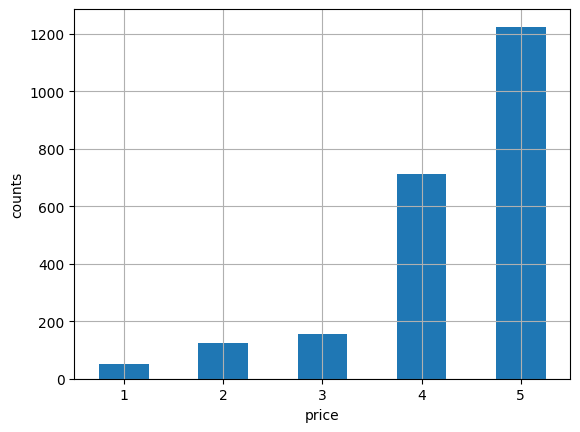

In [80]:
cut_and_plot(residental['price_per_metr'])

In [81]:
residental.drop(residental[residental['price_per_metr']<2e7].index,inplace=True)

In [83]:
residental.drop(residental[(residental['total_rooms']==0)&(residental['real_estate_area']>60)].index,inplace=True)

In [85]:
residental.drop(residental[(residental['real_estate_area']<25)&(residental['total_rooms']>0)].index,inplace=True)

In [86]:
residental.drop(residental[residental['price_per_metr']>0.6e9].index,inplace=True)

## remove total_rooms per area

In [87]:
# index=[]
residental.drop(residental[(residental['total_rooms']>1)&(residental['real_estate_area']<50)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>2)&(residental['real_estate_area']<80)&(residental['real_estate_area']>=50)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>3)&(residental['real_estate_area']<120)&(residental['real_estate_area']>=80)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>5)&(residental['real_estate_area']<200)&(residental['real_estate_area']>=120)].index,inplace=True)


<Axes: xlabel='real_estate_area', ylabel='total_rooms'>

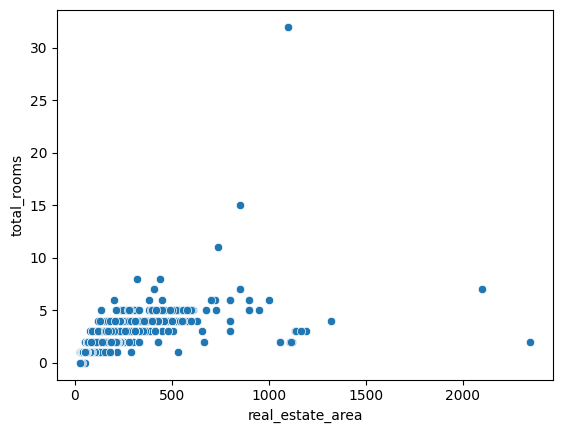

In [88]:
sns.scatterplot(x=residental['real_estate_area'],y=residental['total_rooms'])

In [89]:
drop_facility=['قابل تبدیل','پاساژ','مشارکتی','موقعیت اداری','مال','معاوضه','نوساز']
residental.drop(drop_facility,axis=1,inplace=True)

In [90]:
residental.columns

Index(['district_number', 'district_name', 'real_estate_type',
       'real_estate_area', 'total_rooms', 'number_of_parking',
       'real_estate_age', 'price', 'facilities', 'آسانسور', 'آنتن مرکزی',
       'استخر', 'انباری', 'بالکن', 'تهویه مطبوع', 'جکوزی', 'درب ریموت',
       'روف گاردن', 'سالن اجتماعات', 'سالن ورزش', 'سونا', 'قدرالسهم',
       'قیمت توافقی', 'لابی', 'نگهبان', 'وام دار', 'پارکینگ', 'پیش فروش',
       'price_per_metr'],
      dtype='object')

In [91]:
residental.loc[residental[residental['number_of_parking']>0].index,'پارکینگ']=1

In [92]:
residental['district_name'].unique()

array(['ستارخان', 'شهرارا', 'مرزداران شرقی', 'طوس', 'جیحون', 'دریان نو',
       'استاد معین', 'بریانک', 'تهران ویلا', 'شهرک غرب', 'جنت اباد جنوبی',
       'سازمان اب', 'جردن', 'فردوس', 'سازمان برنامه مرکزی', 'اوین',
       'بلوار میرداماد', 'سازمان برنامه جنوبی', 'ارم', 'پونک جنوبی',
       'مرزداران', 'صادقیه', 'بلوار فردوس شرقی', 'بلوار فردوس غربی',
       'قیطریه', 'هروی', 'سهروردی جنوبی', 'سهروردی شمالی', 'اندیشه',
       'پونک', 'سازمان برنامه شمالی', 'شهر زیبا', 'پونک شمالی',
       'شمس اباد - مجیدیه', 'سید خندان', 'خواجه عبدالله انصاری',
       'جنت اباد مرکزی', 'فرمانیه', 'سعادت اباد', 'کوهک', 'نیاوران',
       'اختیاریه', 'مهران', 'جمشیدیه', 'پاتریس لومومبا', 'جنت اباد شمالی',
       'جنت اباد', 'دروس', 'باغ فیض', 'شهران شمالی', 'شهران\u200e',
       'اباذر', 'شهرک پرواز', 'الهیه', 'فرشته', 'شهرک راه اهن - گلستان',
       'پیامبر شرقی', 'شهران جنوبی', 'شهرک هما', 'دریا', 'کوی فراز',
       'بهنام\u200e', 'کن', 'مرزداران غربی', 'ونک', 'زعفرانیه',
       'دولت - کلاهدوز', 'پاسد

In [93]:
residental

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,سالن ورزش,سونا,قدرالسهم,قیمت توافقی,لابی,نگهبان,وام دار,پارکینگ,پیش فروش,price_per_metr
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,0,1,0,0,1,0,1.181034e+08
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,1,0,9.666667e+07
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,0,0,0,0,1,0,1.086667e+08
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,1,0,1.207547e+08
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,1,0,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,1,0,0,0,1,1,0,1,0,1.200000e+08
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,1,0,5.882353e+07
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,1,0,9.454545e+07
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,1,0,0,0,1,1,0,1,0,1.200000e+08


In [94]:
residental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26581 entries, 0 to 29953
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_number    26581 non-null  int64  
 1   district_name      26581 non-null  object 
 2   real_estate_type   26581 non-null  object 
 3   real_estate_area   26581 non-null  float64
 4   total_rooms        26581 non-null  int64  
 5   number_of_parking  26581 non-null  int64  
 6   real_estate_age    26581 non-null  int64  
 7   price              26581 non-null  float64
 8   facilities         26581 non-null  object 
 9   آسانسور            26581 non-null  int32  
 10  آنتن مرکزی         26581 non-null  int32  
 11  استخر              26581 non-null  int32  
 12  انباری             26581 non-null  int32  
 13  بالکن              26581 non-null  int32  
 14  تهویه مطبوع        26581 non-null  int32  
 15  جکوزی              26581 non-null  int32  
 16  درب ریموت          26581 no